#**FINAL PROJECT**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving test-Project1.csv to test-Project1.csv
Saving train-Project1.csv to train-Project1.csv


In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#importing datasets
data_train = pd.read_csv('train-Project1.csv')
data_test = pd.read_csv('test-Project1.csv')
data_train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


#**Visualizing the dataset**

In [4]:
cities = data_train['City'].unique()
cities.sort()

groups = data_train['City Group'].unique()

types = data_train['Type'].unique()

In [5]:
citywisedata = data_train.groupby('City').mean()
citywisedata.head()


,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
City,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adana,72.666667,4.000000,5.000000,4.000000,3.000000,1.000000,2.666667,5.000000,4.666667,4.666667,5.000000,2.666667,4.666667,5.000000,1.666667,2.000000,3.333333,1.666667,3.666667,3.333333,4.333333,2.000000,3.333333,4.333333,2.333333,2.333333,3.333333,3.000000,2.333333,2.666667,4.333333,3.666667,3.666667,3.000000,3.666667,4.000000,3.333333,2.666667,4.894944e+06
Afyonkarahisar,8.000000,1.000000,1.000000,4.000000,4.000000,1.000000,2.000000,1.000000,5.000000,5.000000,5.000000,1.000000,5.000000,5.000000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,2.000000,2.000000,3.000000,4.000000,5.000000,5.000000,3.000000,4.000000,5.000000,4.000000,5.000000,4.952497e+06
Amasya,110.000000,6.000000,3.000000,6.000000,6.000000,4.000000,4.000000,10.000000,8.000000,10.000000,10.000000,6.000000,10.000000,7.500000,9.000000,8.000000,12.000000,3.000000,12.000000,10.000000,12.000000,6.000000,1.000000,10.000000,2.000000,2.000000,2.500000,2.500000,5.000000,7.500000,15.000000,3.000000,15.000000,6.000000,18.000000,12.000000,16.000000,6.000000,2.954086e+06
Ankara,62.105263,3.526316,4.421053,4.078947,4.736842,2.789474,3.947368,5.368421,5.000000,5.210526,5.263158,3.789474,4.894737,4.921053,0.842105,0.842105,1.684211,0.578947,2.157895,4.421053,4.578947,2.157895,2.263158,3.000000,0.789474,0.789474,0.894737,0.526316,3.157895,2.842105,2.684211,2.315789,3.157895,1.052632,2.684211,2.210526,2.052632,0.736842,3.275406e+06
Antalya,74.000000,3.000000,3.500000,5.250000,4.375000,2.000000,4.000000,4.500000,6.750000,7.500000,7.000000,3.750000,7.500000,5.875000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,5.250000,2.000000,1.250000,3.000000,0.000000,0.000000,0.000000,0.000000,2.875000,4.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.481448e+06


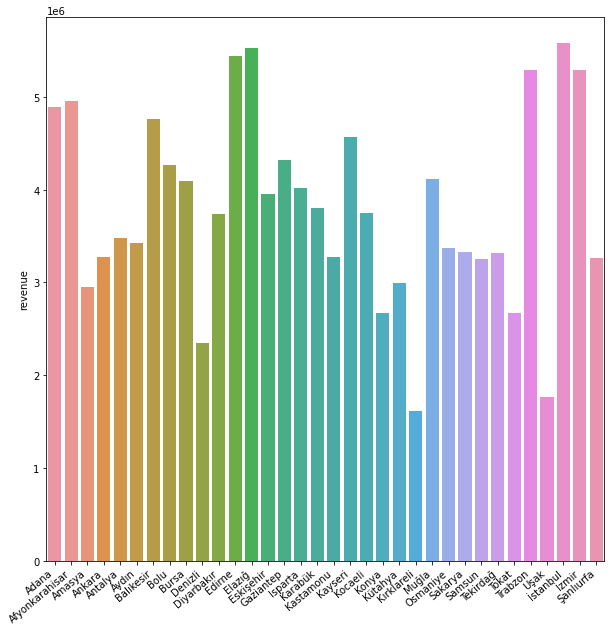

In [6]:
#Plotting the mean data against each city
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.barplot(x = cities, y = citywisedata['revenue'], ax = ax)

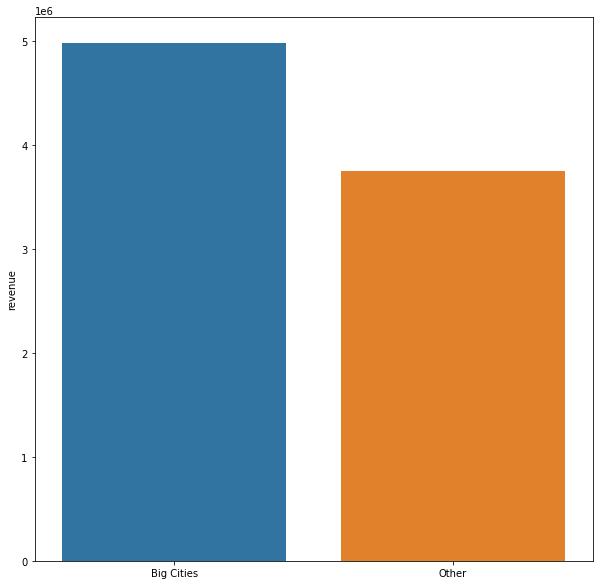

In [7]:
#PLotting the city type against its mean revenue
citytypewisedata = data_train.groupby('City Group').mean()

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

sns.barplot(x = groups, y = citytypewisedata['revenue'], ax = ax)

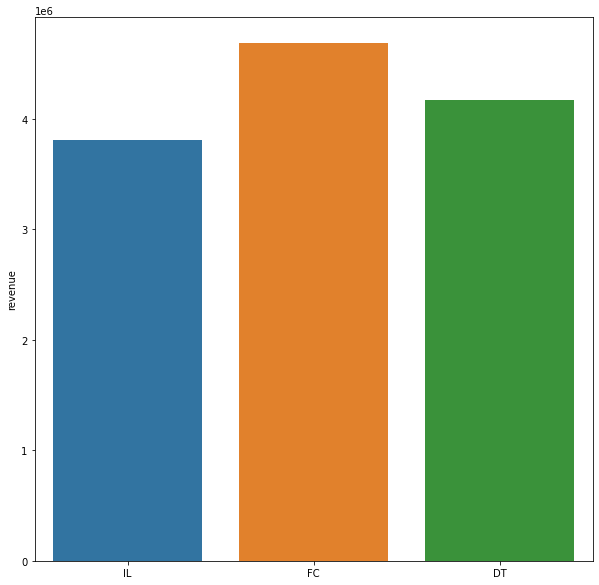

In [8]:
#Plotting each city group against its mean
citygroupwisedata = data_train.groupby('Type').mean()

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

sns.barplot(x = types, y = citygroupwisedata['revenue'], ax = ax)

In [9]:
cat_col=data_train.select_dtypes(include='object').columns
num_col=data_train.select_dtypes(exclude='object').columns

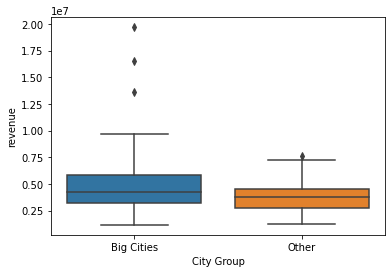

In [10]:
#Plotting the categorical data against the target values

sns.boxplot(x = 'City Group', y = 'revenue', data = data_train)

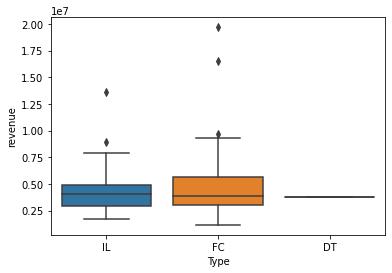

In [11]:
sns.boxplot(x = 'Type', y = 'revenue', data = data_train)

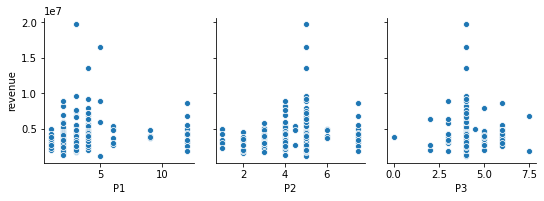

In [12]:
#Plotting the Numerical data against the Target Variable
pp = sns.pairplot(data=data_train,
                  y_vars=['revenue'],
                  x_vars=['P1', 'P2', 'P3']) 

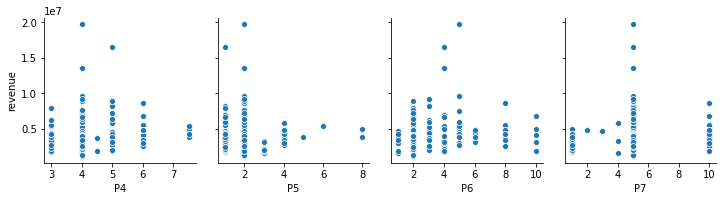

In [13]:
pp = sns.pairplot(data=data_train,
                  y_vars=['revenue'],
                  x_vars=['P4', 'P5', 'P6', 'P7']) 

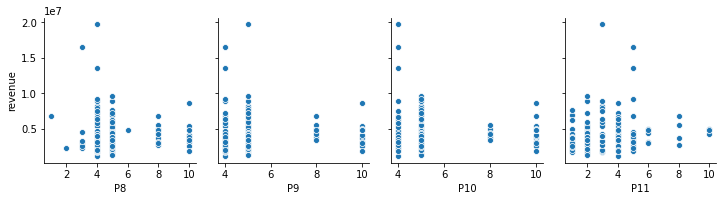

In [14]:
pp = sns.pairplot(data=data_train,
                  y_vars=['revenue'],
                  x_vars=['P8', 'P9', 'P10', 'P11']) 

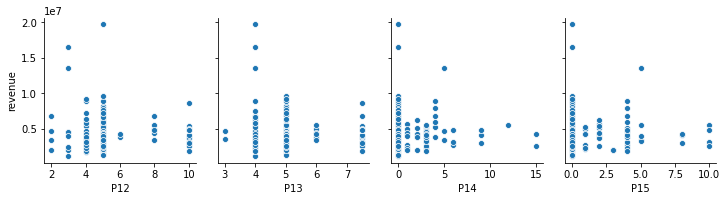

In [15]:
pp = sns.pairplot(data=data_train,
                  y_vars=['revenue'],
                  x_vars=['P12', 'P13', 'P14', 'P15']) 

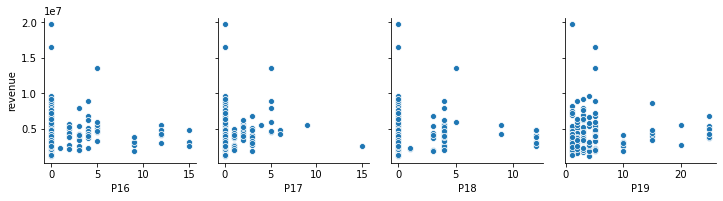

In [16]:
pp = sns.pairplot(data=data_train,
                  y_vars=['revenue'],
                  x_vars=['P16', 'P17','P18', 'P19']) 

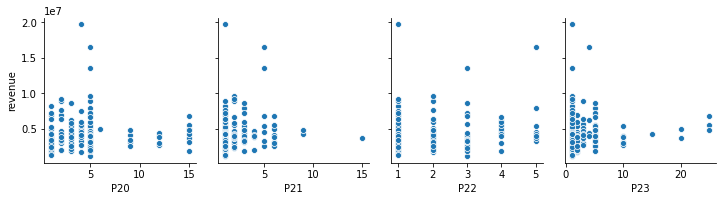

In [17]:
pp = sns.pairplot(data=data_train,
                  y_vars=['revenue'],
                  x_vars=['P20', 'P21', 'P22', 'P23']) 

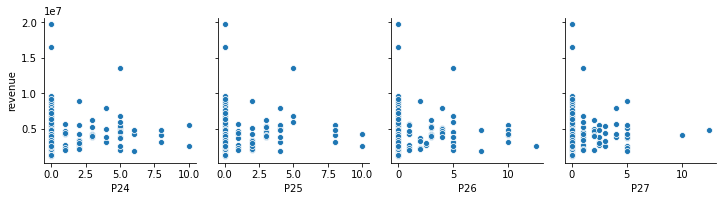

In [18]:
pp = sns.pairplot(data=data_train,
                  y_vars=['revenue'],
                  x_vars=['P24', 'P25', 'P26', 'P27']) 

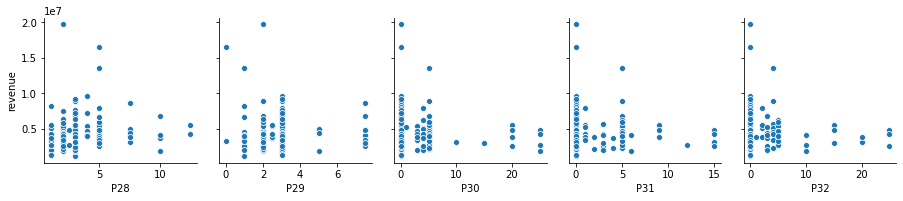

In [19]:
pp = sns.pairplot(data=data_train,
                  y_vars=['revenue'],
                  x_vars=['P28', 'P29', 'P30', 'P31', 'P32']) 

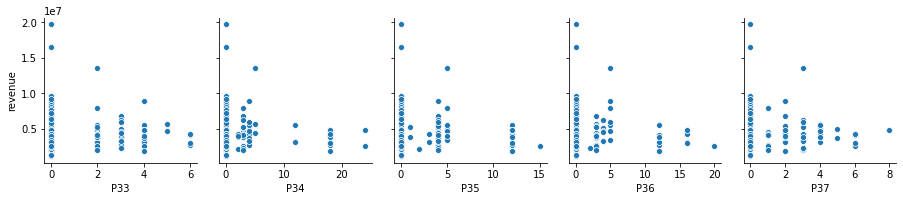

In [20]:
pp = sns.pairplot(data=data_train,
                  y_vars=['revenue'],
                  x_vars=['P33', 'P34', 'P35', 'P36', 'P37']) 

#**Preprocessing the dataset**

In [21]:
#Creating a flag for each type of restaurant
data_train['Type_IL'] = np.where(data_train['Type'] == 'IL', 1, 0)
data_train['Type_FC'] = np.where(data_train['Type'] == 'FC', 1, 0)
data_train['Type_DT'] = np.where(data_train['Type'] == 'DT', 1, 0)

#Creating a flag for 'Big Cities'
data_train['Big_Cities'] = np.where(data_train['City Group'] == 'Big Cities', 1, 0)

#Converting Open_Date into day count
#Considering the same date the dataset was made available
data_train['Days_Open'] = (pd.to_datetime('2015-03-23') - pd.to_datetime(data_train['Open Date'])).dt.days

#Removing unused columns
data_train = data_train.drop('Type', axis=1)
data_train = data_train.drop('City Group', axis=1)
data_train = data_train.drop('City', axis=1)
data_train = data_train.drop('Open Date', axis=1)

#Adjusting test data as well
data_test['Type_IL'] = np.where(data_test['Type'] == 'IL', 1, 0)
data_test['Type_FC'] = np.where(data_test['Type'] == 'FC', 1, 0)
data_test['Type_DT'] = np.where(data_test['Type'] == 'DT', 1, 0)
data_test['Big_Cities'] = np.where(data_test['City Group'] == 'Big Cities', 1, 0)
data_test['Days_Open'] = (pd.to_datetime('2015-03-23') - pd.to_datetime(data_test['Open Date'])).dt.days
data_test = data_test.drop('Type', axis=1)
data_test = data_test.drop('City Group', axis=1)
data_test = data_test.drop('City', axis=1)
data_test = data_test.drop('Open Date', axis=1)
data_train.head()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Type_IL,Type_FC,Type_DT,Big_Cities,Days_Open
0,0,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0,1,0,0,1,5728
1,1,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0,0,1,0,1,2594
2,2,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0,1,0,0,0,744
3,3,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0,1,0,0,0,1145
4,4,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0,1,0,0,0,2144


#**Implementing the models**

In [29]:
X = data_train.drop(['Id', 'revenue'], axis=1)
Y = data_train.revenue
X.shape

(137, 42)

In [30]:
#implementing ols regressor and plotting its summary
import statsmodels.api as sm
X_temp = X
X_temp = np.append(arr = np.ones((137,1)).astype(int),values = X, axis = 1)

X_temp = X_temp.astype(np.float64)
regressor_OLS = sm.OLS(Y, X_temp).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1.267
Date:                Wed, 12 Aug 2020   Prob (F-statistic):              0.174
Time:                        12:27:05   Log-Likelihood:                -2186.4
No. Observations:                 137   AIC:                             4457.
Df Residuals:                      95   BIC:                             4579.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.97e+06   3.32e+06      1.195      0.235   -2.63e+06    1.06e+07
x1          3.161e+05    3.5e+05      0.902      0.369   -3.79e+05    1.01e+06
x2          1.555e+05   3.85e+05      0.404      0.687   -6.08e+05    9.19e+05
x3         -3.683e+05    4.9e+05     -0.751      0.454   -1.34e+06    6.05e+05
x4          -1.36e+05   5.48e+05     -0.248      0.805   -1.22e+06    9.53e+05
x5          1.294e+05   3.91e+05      0.331      0.742   -6.47e+05    9.06e+05
x6          2.867e+05   2.68e+05      1.071      0.287   -2.45e+05    8.18e+05
x7         -1.127e+04   2.85e+05     -0.040      0.969   -5.77e+05    5.54e+05
x8         -1.203e+06   5.38e+05     -2.236      0.028   -2.27e+06   -1.35e+05
x9          1.488e+06   1.06e+06      1.400      0.165   -6.22e+05     3.6e+06
x10        -6.402e+04   1.67e+06     -0.038      0.970   -3.38e+06    3.25e+06
x11        -3.063e+05   3.07e+05     -0.999      0.320   -9.15e+05    3.02e+05
x12         -3.13e+05   6.88e+05     -0.455      0.650   -1.68e+06    1.05e+06
x13        -5.434e+05   1.57e+06     -0.347      0.729   -3.65e+06    2.57e+06
x14        -1.194e+05   3.52e+05     -0.339      0.736   -8.19e+05     5.8e+05
x15        -2.158e+05   4.94e+05     -0.436      0.664    -1.2e+06    7.66e+05
x16        -4.039e+05   5.58e+05     -0.724      0.471   -1.51e+06    7.04e+05
x17         2.054e+05   3.71e+05      0.553      0.582   -5.32e+05    9.43e+05
x18         3.361e+05   4.15e+05      0.811      0.420   -4.87e+05    1.16e+06
x19        -8.985e+04   1.45e+05     -0.620      0.536   -3.77e+05    1.98e+05
x20        -3.053e+05   1.82e+05     -1.680      0.096   -6.66e+05    5.55e+04
x21         1.497e+05    2.6e+05      0.576      0.566   -3.66e+05    6.65e+05
x22        -2.983e+05   2.72e+05     -1.095      0.276   -8.39e+05    2.42e+05
x23         1.523e+05   1.33e+05      1.149      0.254   -1.11e+05    4.16e+05
x24         5.087e+05   5.69e+05      0.895      0.373    -6.2e+05    1.64e+06
x25         3.712e+05   5.49e+05      0.676      0.500   -7.18e+05    1.46e+06
x26        -1.071e+06   6.13e+05     -1.748      0.084   -2.29e+06    1.46e+05
x27         9.661e+04   2.28e+05      0.423      0.673   -3.57e+05     5.5e+05
x28          4.75e+05    3.2e+05      1.484      0.141    -1.6e+05    1.11e+06
x29        -1.054e+05   3.42e+05     -0.308      0.759   -7.85e+05    5.74e+05
x30         6.346e+04    1.7e+05      0.373      0.710   -2.74e+05    4.01e+05
x31         1.609e+05   2.73e+05      0.590      0.557   -3.81e+05    7.02e+05
x32          -3.3e+05   2.66e+05     -1.241      0.218   -8.58e+05    1.98e+05
x33        -1.423e+05   4.45e+05     -0.320      0.750   -1.03e+06    7.41e+05
x34        -1.773e+05   4.06e+05     -0.437      0.663   -9.82e+05    6.28e+05
x35         4.356e+04   3.73e+05      0.117      0.907   -6.97e+05    7.84e+05
x3

In [31]:
#Implementing Multiple Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()
regressor.fit(X, Y)

test_predicted_mreg = pd.DataFrame()
test_predicted_mreg['Id'] = data_test.Id
test_predicted_mreg['Prediction'] = regressor.predict(data_test.drop('Id', axis=1))
test_predicted_mreg.head()

,Id,Prediction
0,0,4.669238e+06
1,1,2.741557e+06
2,2,1.815584e+06
3,3,5.312600e+06
4,4,5.493380e+06


In [46]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

regressor_accuracy = LinearRegression()
regressor_accuracy.fit(X_train, y_train)

y_pred = regressor_accuracy.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3004513.8682692987
Mean Squared Error: 19196941411388.652
Root Mean Squared Error: 4381431.434062235
R squared score: -0.8044963011047319


In [33]:
#Implementing Logistic Regression
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X, Y)

test_predicted_lreg = pd.DataFrame()
test_predicted_lreg['Id'] = data_test.Id
test_predicted_lreg['Prediction'] = reg.predict(data_test.drop('Id', axis=1))
test_predicted_lreg.head()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Id,Prediction
0,0,4888774.0
1,1,4067566.0
2,2,3426169.0
3,3,5017319.0
4,4,3752885.0


In [47]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

regressor_accuracy = LogisticRegression()
regressor_accuracy.fit(X_train, y_train)

y_pred = regressor_accuracy.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 2065004.2142857143
Mean Squared Error: 13982633811870.072
Root Mean Squared Error: 3739336.012164469
R squared score: -0.31435578473208037


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [35]:
#Implementing Support Vector Machines
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X, Y)

test_predicted_svm = pd.DataFrame()
test_predicted_svm['Id'] = data_test.Id
test_predicted_svm['Prediction'] = classifier.predict(data_test.drop('Id', axis=1))
test_predicted_svm.head()

,Id,Prediction
0,0,5461700.0
1,1,2344689.0
2,2,1904842.0
3,3,2371202.0
4,4,1619683.0


In [48]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

regressor_accuracy = SVC(kernel='rbf', random_state = 1)
regressor_accuracy.fit(X_train, y_train)

y_pred = regressor_accuracy.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 2357957.785714286
Mean Squared Error: 9352554362343.428
Root Mean Squared Error: 3058194.624667212
R squared score: 0.12086777830568829


In [37]:
#Implementing Ridge and Lasso Model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import metrics

#Lasso Regression
model = Lasso(alpha=5.5)
model.fit(X, Y)

test_predicted = pd.DataFrame()
test_predicted['Id'] = data_test.Id
test_predicted['Prediction'] = model.predict(data_test.drop('Id', axis=1))
test_predicted.head()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 268250168671059.75, tolerance: 90251570180.51764
  positive)


,Id,Prediction
0,0,4.669774e+06
1,1,2.740680e+06
2,2,1.815398e+06
3,3,5.311360e+06
4,4,5.492584e+06


In [49]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

regressor_accuracy = Lasso(alpha=5.5)
regressor_accuracy.fit(X_train, y_train)

y_pred = regressor_accuracy.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3004980.5481886053
Mean Squared Error: 19201868342792.414
Root Mean Squared Error: 4381993.649332734
R squared score: -0.8049594285010895


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 152400573609025.2, tolerance: 59500002162.953926
  positive)


In [39]:
#Ridge Regression
model = Ridge(alpha=330)
model.fit(X, Y)

test_predicted_ridge = pd.DataFrame()
test_predicted_ridge['Id'] = data_test.Id
test_predicted_ridge['Prediction'] = model.predict(data_test.drop('Id', axis=1))
test_predicted_ridge.head()

,Id,Prediction
0,0,4.229698e+06
1,1,3.822859e+06
2,2,3.636879e+06
3,3,3.882530e+06
4,4,3.957615e+06


In [50]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

regressor_accuracy = Ridge(alpha=330)
regressor_accuracy.fit(X_train, y_train)

y_pred = regressor_accuracy.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 1930832.797409726
Mean Squared Error: 10032310013899.816
Root Mean Squared Error: 3167382.202055795
R squared score: 0.05697132039594843


In [41]:
#Random Forest Regression Implementation
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=150)
model.fit(X, Y)

test_predicted_forest = pd.DataFrame()
test_predicted_forest['Id'] = data_test.Id
test_predicted_forest['Prediction'] = model.predict(data_test.drop('Id', axis=1))
test_predicted_forest.head()

,Id,Prediction
0,0,3.991361e+06
1,1,3.421446e+06
2,2,3.575349e+06
3,3,3.433682e+06
4,4,4.420646e+06


In [51]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

regressor_accuracy = RandomForestRegressor(n_estimators=150)
regressor_accuracy.fit(X_train, y_train)

y_pred = regressor_accuracy.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 1563027.243333333
Mean Squared Error: 9914139832189.248
Root Mean Squared Error: 3148672.7096014996
R squared score: 0.06807921780668336


In [43]:
#Decision tree Regression Model
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, Y)

test_predicted_tree = pd.DataFrame()
test_predicted_tree['Id'] = data_test.Id
test_predicted_tree['Prediction'] = model.predict(data_test.drop('Id', axis=1))
test_predicted_tree.head()

,Id,Prediction
0,0,3.991361e+06
1,1,3.421446e+06
2,2,3.575349e+06
3,3,3.433682e+06
4,4,4.420646e+06


In [52]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

regressor_accuracy = DecisionTreeRegressor(random_state = 0)
regressor_accuracy.fit(X_train, y_train)

y_pred = regressor_accuracy.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 1917038.7142857143
Mean Squared Error: 10582062293044.715
Root Mean Squared Error: 3253008.1913583796
R squared score: 0.005295069842183531
